In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
import os

In [3]:
os.chdir('/Users/ariana/desktop/historical_tech')

In [4]:
# don't use default na, this erroneously converts 'NA' (iso code for Namibia) to a missing value
# I manually input all the default na vals except for 'NA' to prevent this
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
hatch_v2 = pd.read_csv('all_tech_version 2.0.csv', keep_default_na=False, 
                       na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
                                  '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', 'None', ''])

In [5]:
# we just want to test global adoption data, omit cost and country-level data (use US where no world data)
hatch_v2 = hatch_v2[(hatch_v2['Metric']!='Levelized Cost of Energy') & (hatch_v2['Metric']!='Price') & (hatch_v2['Metric']!='Total Installed Cost')]
hatch_v2.reset_index(drop=True, inplace=True)

In [6]:
all_tech = list(set(hatch_v2['Technology Name']))
len(all_tech)

215

In [7]:
hatch_v2_world = hatch_v2[hatch_v2['Country Name']=='World']
hatch_v2_world.reset_index(drop=True, inplace=True)
hatch_v2_world

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Maleic Anhydride_Annual production_World,Global,World,World,Maleic Anhydride,Annual production,million pounds,PCDB,Annual production|Maleic Anhydride,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Concentrated Solar Power_Installed Capacity_World,Global,World,World,Concentrated Solar Power,Installed Capacity,MW,IPCC,Installed Capacity|Concentrated Solar Power,NaN,...,4750.00000,4860.000000,4959.000000,5674.000000,6275.0,6925.0,7625.0,NaN,NaN,NaN
2,Polyvinylchloride_Annual production_World,Global,World,World,Polyvinylchloride,Annual production,million pounds,PCDB,Annual production|Polyvinylchloride,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pentaerythritol_Annual production_World,Global,World,World,Pentaerythritol,Annual production,million pounds,PCDB,Annual production|Pentaerythritol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paraxylene_Annual production_World,Global,World,World,Paraxylene,Annual production,million pounds,PCDB,Annual production|Paraxylene,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Vinyl Chloride_Annual production_World,Global,World,World,Vinyl Chloride,Annual production,million pounds,PCDB,Annual production|Vinyl Chloride,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Polyester Fiber_Annual production_World,Global,World,World,Polyester Fiber,Annual production,million pounds,PCDB,Annual production|Polyester Fiber,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Wet Flue Gas Desulfurization Systems_Cumulativ...,Global,World,World,Wet Flue Gas Desulfurization Systems,Cumulative Total Capacity,GWe,"Taylor, Rubin, & Hounshell",Cumulative Total Capacity|Wet Flue Gas Desulfu...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Styrene_Annual production_World,Global,World,World,Styrene,Annual production,million pounds,PCDB,Annual production|Styrene,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
world_list = list(hatch_v2_world['Technology Name'])

In [9]:
drop_list = []
for row in range(len(hatch_v2)):
    tech = hatch_v2.iloc[row]['Technology Name']
    if tech in world_list:
        drop_list.append(row)

In [22]:
hatch_v2_us = hatch_v2.drop(drop_list)
hatch_v2_us = hatch_v2_us[(hatch_v2_us['Country Code']=='US') & (hatch_v2_us['Metric']!='Cumulative Rated Power') & (hatch_v2_us['Technology Name']!='Marine Energy')]
hatch_v2_us.reset_index(drop=True,inplace=True)
hatch_v2_us

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Nuclear Weapons_Total Number_US,National,US,United States,Nuclear Weapons,Total Number,-,Norris & Kristensen,Total Number|Nuclear Weapons,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dishwashers_Share of Households_US,National,US,United States,Dishwashers,Share of Households,%,OWID,Share of Households|Dishwashers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cable TV_Share of Households_US,National,US,United States,Cable TV,Share of Households,%,OWID,Share of Households|Cable TV,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Home Air Conditioning_Share of Households_US,National,US,United States,Home Air Conditioning,Share of Households,%,OWID,Share of Households|Home Air Conditioning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Water Heater_Share of Households_US,National,US,United States,Water Heater,Share of Households,%,OWID,Share of Households|Water Heater,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Real-Time Gross Settlement Adoption_Share of M...,National,US,United States,Real-Time Gross Settlement Adoption,Share of Market,%,OWID,Share of Market|Real-Time Gross Settlement Ado...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Latent Heat Storage_Cumulative Rated Capacity_US,National,US,United States,Latent Heat Storage,Cumulative Rated Capacity,kWh,GESDB,Cumulative Rated Capacity|Latent Heat Storage,NaN,...,624645.96,636645.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Pumped Hydro Storage_Cumulative Rated Capacity_US,National,US,United States,Pumped Hydro Storage,Cumulative Rated Capacity,kWh,GESDB,Cumulative Rated Capacity|Pumped Hydro Storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Telegraph Traffic_Total Number_US,National,US,United States,Telegraph Traffic,Total Number,-,CHAT,Total Number|Telegraph Traffic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def hatch_plot(df, idx, entity):
    tech_name = df.iloc[idx]['Technology Name']
    unit = df.iloc[idx]['Unit']
    metric = df.iloc[idx]['Metric']
    tech_series = df.iloc[idx][9:]
    tech_series.dropna(how='all', inplace=True)
    ax = tech_series.plot.line()
    ax.set_title(tech_name + ' (' + entity +')')
    if unit == '%' or unit == '-':
        ax.set_ylabel(metric)
    else:
        ax.set_ylabel(unit)
    ax.set_ylim(ymin=0)
    file_name = 'visualize/viz/' + tech_name + '.png'
    matplotlib.pyplot.savefig(file_name)
    # line below is needed to clear axes
    # without it the loop will write over the same graph and try to plot 100 lines on one graph
    matplotlib.pyplot.cla()

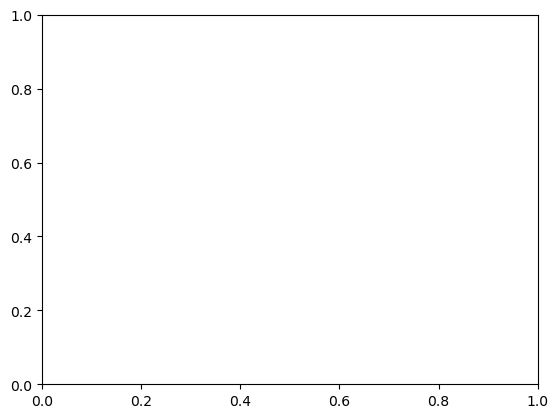

In [12]:
for idx in range(len(hatch_v2_world)):
    hatch_plot(hatch_v2_world, idx, 'World')

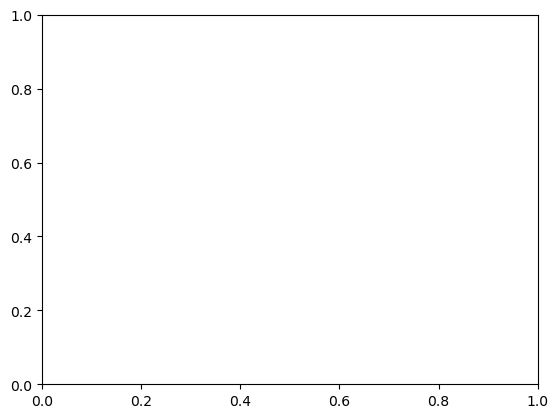

In [13]:
for idx in range(len(hatch_v2_us)):
    hatch_plot(hatch_v2_us, idx, 'US')

In [14]:
# adding in remaining 8 tech that do not have US or world data
df_1 = hatch_v2[((hatch_v2['Technology Name']=='Tin') | (hatch_v2['Technology Name']=='YFV Vaccine') | (hatch_v2['Technology Name']=='Artificial and Synthetic Fibers') | (hatch_v2['Technology Name']=='BCG Vaccine')) & (hatch_v2['Country Name']=='Brazil')]
df_1.reset_index(drop=True,inplace=True)
df_1

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Artificial and Synthetic Fibers_Annual Product...,National,BR,Brazil,Artificial and Synthetic Fibers,Annual Production,thousand metric tons,Mitchell,Annual Production|Artificial and Synthetic Fibers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tin_Annual Production_BR,National,BR,Brazil,Tin,Annual Production,thousand metric tons,Mitchell,Annual Production|Tin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BCG Vaccine_Share of Population_BR,National,BR,Brazil,BCG Vaccine,Share of Population,%,UNICEF,Share of Population|BCG Vaccine,NaN,...,0.90,0.91,0.92,0.79,0.67,0.63,NaN,NaN,NaN,NaN
3,YFV Vaccine_Share of Population_BR,National,BR,Brazil,YFV Vaccine,Share of Population,%,UNICEF,Share of Population|YFV Vaccine,NaN,...,0.43,0.55,0.58,0.60,0.57,0.58,NaN,NaN,NaN,NaN


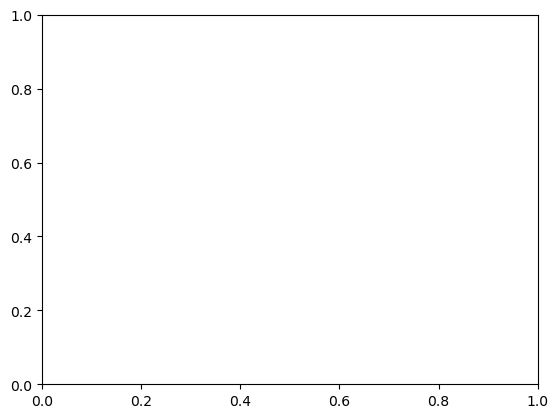

In [15]:
for idx in range(len(df_1)):
    hatch_plot(df_1, idx, 'Brazil')

In [16]:
df_2 = hatch_v2[((hatch_v2['Technology Name']=='Hydrogen Storage') | (hatch_v2['Technology Name']=='Steamships')) & (hatch_v2['Country Name']=='Germany') & (hatch_v2['Unit']!='kW')]
df_2.reset_index(drop=True,inplace=True)
df_2


,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Steamships_Total Number_DE,National,DE,Germany,Steamships,Total Number,-,CHAT,Total Number|Steamships,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hydrogen Storage_Cumulative Rated Capacity_DE,National,DE,Germany,Hydrogen Storage,Cumulative Rated Capacity,kWh,GESDB,Cumulative Rated Capacity|Hydrogen Storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


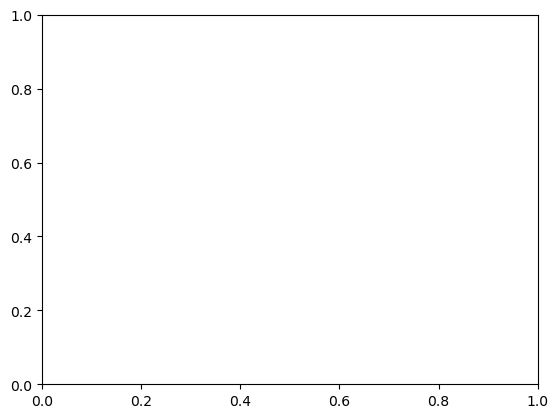

In [17]:
for idx in range(len(df_2)):
    hatch_plot(df_2, idx, 'Germany')

In [18]:
df_3 = hatch_v2[((hatch_v2['Technology Name']=='Gold') | (hatch_v2['Technology Name']=='Silver')) & (hatch_v2['Country Name']=='South Africa')]
df_3.reset_index(drop=True,inplace=True)
df_3


,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Silver_Annual Production_ZA,National,ZA,South Africa,Silver,Annual Production,metric tons,Mitchell,Annual Production|Silver,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gold_Annual Production_ZA,National,ZA,South Africa,Gold,Annual Production,metric tons,Mitchell,Annual Production|Gold,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


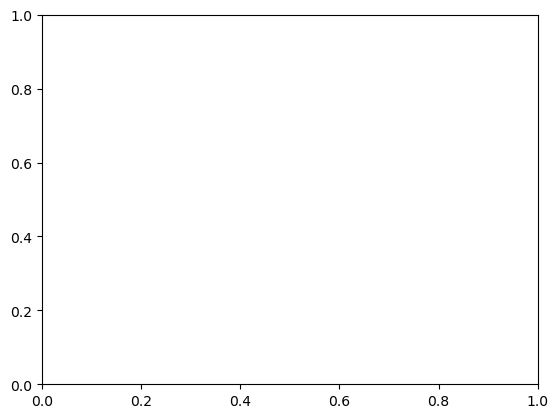

In [19]:
for idx in range(len(df_3)):
    hatch_plot(df_3, idx, 'South Africa')

In [23]:
marine = hatch_v2[(hatch_v2['Technology Name']=='Marine Energy') & (hatch_v2['Country Name']=='France')]
marine.reset_index(drop=True,inplace=True)
marine

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Marine Energy_Installed electricity capacity_FR,National,FR,France,Marine Energy,Installed electricity capacity,MW,IRENASTAT,Installed electricity capacity|Marine Energy,NaN,...,220.224,218.87,218.002,214.067,211.765,211.765,NaN,NaN,NaN,NaN


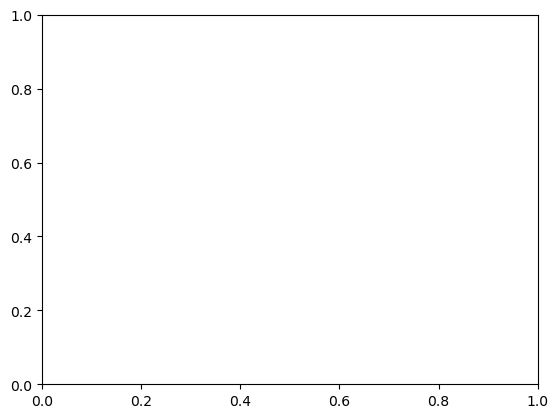

In [24]:
for idx in range(len(marine)):
    hatch_plot(marine, idx, 'France')

In [20]:
viz_list = os.listdir('visualize/viz')
print(len(viz_list))
for item in viz_list:
    if item[-4:]!='.png':
        print(item)

216
.DS_Store
